# Function-based signatures across GB

This notebook explores creation of signatures based on form data only.

The method mirrors creation of standard spatial signatures.

In [7]:
import dask.dataframe
import numpy as np
import pandas as pd

from clustergram import Clustergram

In [2]:
data = dask.dataframe.read_parquet("../../urbangrammar_samba/spatial_signatures/clustering_data/function/standardized/")
data = data.drop(columns=["keep_q1", "keep_q2", "keep_q3"])
%time data = data.compute()
data

CPU times: user 24.5 s, sys: 27.6 s, total: 52.1 s
Wall time: 44.4 s


population_q1  population_q2  population_q3  \
hindex                                                          
c000e109777t0000      -0.206314       0.365497       0.291477   
c000e109777t0001      -0.208114       0.364186       0.274707   
c000e109777t0002      -0.142215       0.414750       0.298747   
c000e109777t0003      -0.080063       0.383735       0.286717   
c000e109777t0004      -0.114962       0.413013       0.298597   
...                         ...            ...            ...   
c102e634855t0000      -0.772446      -0.547355      -0.368144   
c102e634854t0000      -0.865883      -0.694259      -0.458359   
c102e634847t0000      -0.772446      -0.547355      -0.368144   
c102e634850t0000      -0.850124      -0.665683      -0.441754   
c102e614920t0000      -0.791901      -0.572008      -0.399926   

                  night_lights_q1  night_lights_q2  night_lights_q3  \
hindex                                                                
c000e109777t0000        -0.409151        -0.446148        -0.456031   
c000e109777t0001        -0.385136        -0.411700        -0.456031   
c000e109777t0002        -0.404727        -0.431615        -0.450650   
c000e109777t0003        -0.420736        -0.446148        -0.456031   
c000e109777t0004        -0.409151        -0.446148        -0.456031   
...                           ...              ...              ...   
c102e634855t0000        -0.715754        -0.701275        -0.645591   
c102e634854t0000        -0.730629        -0.743258        -0.696025   
c102e634847t0000        -0.715754        -0.701275        -0.645591   
c102e634850t0000        -0.726603        -0.735184        -0.690808   
c102e614920t0000        -0.715938        -0.699391        -0.645591   

                  A, B, D, E. Agriculture, energy and water_q1  \
hindex                                                           
c000e109777t0000                                     -0.843645   
c000e109777t0001                                     -0.971278   
c000e109777t0002                                     -0.891030   
c000e109777t0003                                     -0.854549   
c000e109777t0004                                     -0.887856   
...                                                        ...   
c102e634855t0000                                      0.011376   
c102e634854t0000                                      0.219933   
c102e634847t0000                                      0.011376   
c102e634850t0000                                      0.194017   
c102e614920t0000                                      0.103731   

                  A, B, D, E. Agriculture, energy and water_q2  \
hindex                                                           
c000e109777t0000                                     -0.680719   
c000e109777t0001                                     -0.729707   
c000e109777t0002                                     -0.694121   
c000e109777t0003                                     -0.740079   
c000e109777t0004                                     -0.694495   
...                                                        ...   
c102e634855t0000                                      0.305189   
c102e634854t0000                                      0.540991   
c102e634847t0000                                      0.305189   
c102e634850t0000                                      0.493856   
c102e614920t0000                                      0.359254   

                  A, B, D, E. Agriculture, energy and water_q3  \
hindex                                                           
c000e109777t0000                                     -0.464860   
c000e109777t0001                                     -0.463592   
c000e109777t0002                                     -0.466906   
c000e109777t0003                                     -0.491802   
c000e109777t0004                                     -0.466758   
...                                                        ...   
c1

In [21]:
data.columns.values

array(['population_q1', 'population_q2', 'population_q3',
       'night_lights_q1', 'night_lights_q2', 'night_lights_q3',
       'A, B, D, E. Agriculture, energy and water_q1',
       'A, B, D, E. Agriculture, energy and water_q2',
       'A, B, D, E. Agriculture, energy and water_q3',
       'C. Manufacturing_q1', 'C. Manufacturing_q2',
       'C. Manufacturing_q3', 'F. Construction_q1', 'F. Construction_q2',
       'F. Construction_q3',
       'G, I. Distribution, hotels and restaurants_q1',
       'G, I. Distribution, hotels and restaurants_q2',
       'G, I. Distribution, hotels and restaurants_q3',
       'H, J. Transport and communication_q1',
       'H, J. Transport and communication_q2',
       'H, J. Transport and communication_q3',
       'K, L, M, N. Financial, real estate, professional and administrative activities_q1',
       'K, L, M, N. Financial, real estate, professional and administrative activities_q2',
       'K, L, M, N. Financial, real estate, professional and adm

In [3]:
data = data.replace([np.inf, -np.inf], np.nan).fillna(0)

In [22]:
cgram = Clustergram(range(1, 25), method='minibatchkmeans', batch_size=1_000_000, n_init=100, random_state=42)
cgram.fit(data)

K=1 skipped. Mean computed from data directly.
K=2 fitted in 438.57887077331543 seconds.
K=3 fitted in 481.95261907577515 seconds.
K=4 fitted in 521.4547460079193 seconds.
K=5 fitted in 561.0414683818817 seconds.
K=6 fitted in 600.828937292099 seconds.
K=7 fitted in 764.945318698883 seconds.
K=8 fitted in 829.6346256732941 seconds.
K=9 fitted in 874.9183557033539 seconds.
K=10 fitted in 915.4329822063446 seconds.
K=11 fitted in 963.5221800804138 seconds.
K=12 fitted in 1007.6710164546967 seconds.
K=13 fitted in 1039.0629951953888 seconds.
K=14 fitted in 1076.3578605651855 seconds.
K=15 fitted in 1117.3909075260162 seconds.
K=16 fitted in 1192.9363079071045 seconds.
K=17 fitted in 1239.1707978248596 seconds.
K=18 fitted in 1289.4472596645355 seconds.
K=19 fitted in 1316.8120160102844 seconds.
K=20 fitted in 1358.3061792850494 seconds.
K=21 fitted in 1438.8004968166351 seconds.
K=22 fitted in 1493.9968583583832 seconds.
K=23 fitted in 1537.079713344574 seconds.
K=24 fitted in 1568.364884

In [6]:
import urbangrammar_graphics as ugg
import seaborn as sns

sns.set(style='whitegrid')

CPU times: user 6min 58s, sys: 1min 20s, total: 8min 18s
Wall time: 1min 52s


(-20.0, 30.0)

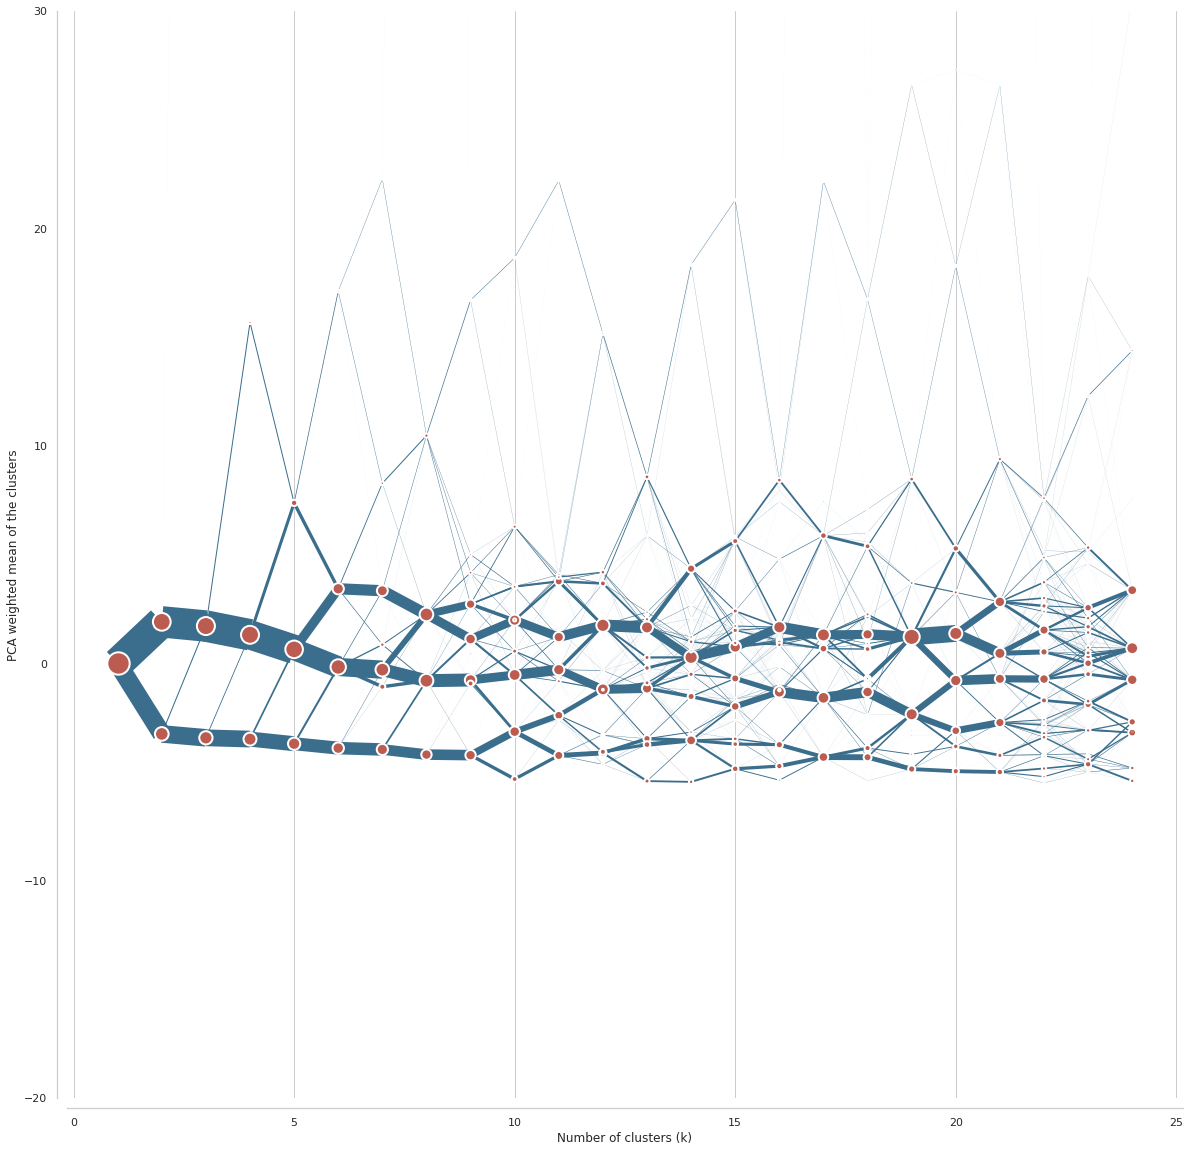

In [23]:
%%time

ax = cgram.plot(
    figsize=(20, 20),
    line_style=dict(color=ugg.COLORS[1]),
    cluster_style={"color": ugg.COLORS[2]},
)
ax.yaxis.grid(False)
sns.despine(offset=10)
ax.set_ylim(-20, 30)

In [24]:
from bokeh.io import output_notebook
from bokeh.plotting import show

output_notebook()

Loading BokehJS ...

In [25]:
fig = cgram.bokeh(
    figsize=(800, 600),
    line_style=dict(color=ugg.HEX[1]),
    cluster_style={"color": ugg.HEX[2]},
)
show(fig)

In [26]:
fig2 = cgram.bokeh(
    figsize=(800, 600),
    line_style=dict(color=ugg.HEX[1]),
    cluster_style={"color": ugg.HEX[2]},
    pca_weighted=False
)
show(fig2)

<AxesSubplot:title={'center':'silhouette'}>

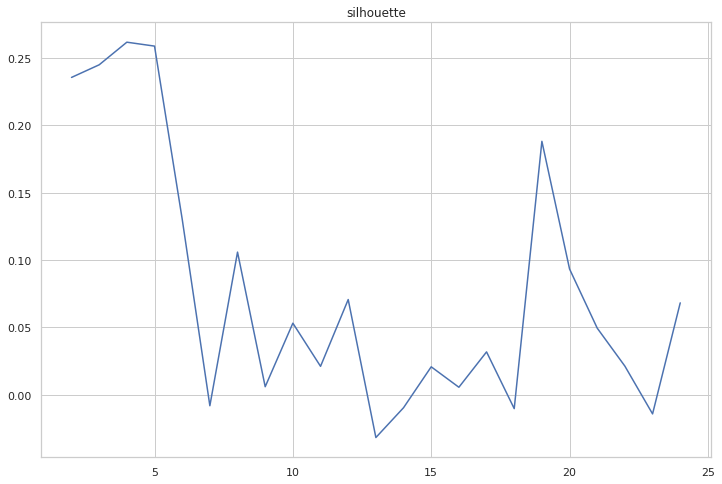

In [27]:
cgram.silhouette_score(sample_size=100_000)
cgram.silhouette.plot(figsize=(12, 8), title="silhouette")

<AxesSubplot:title={'center':'calinski_harabasz'}>

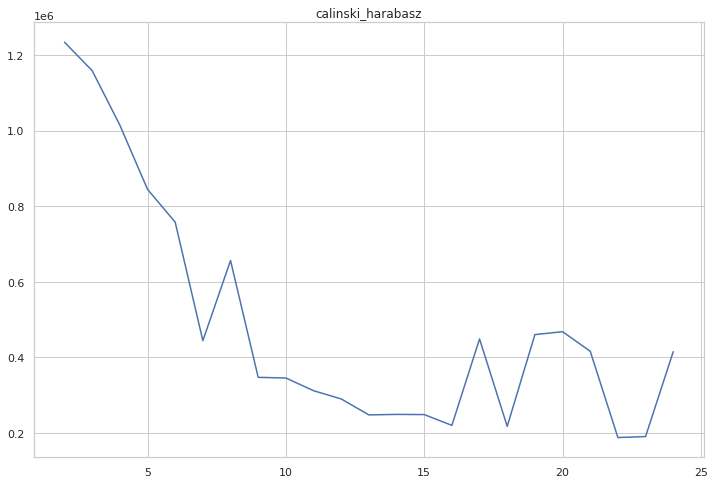

In [28]:
cgram.calinski_harabasz_score()
cgram.calinski_harabasz.plot(figsize=(12, 8), title="calinski_harabasz")

<AxesSubplot:title={'center':'davies_bouldin'}>

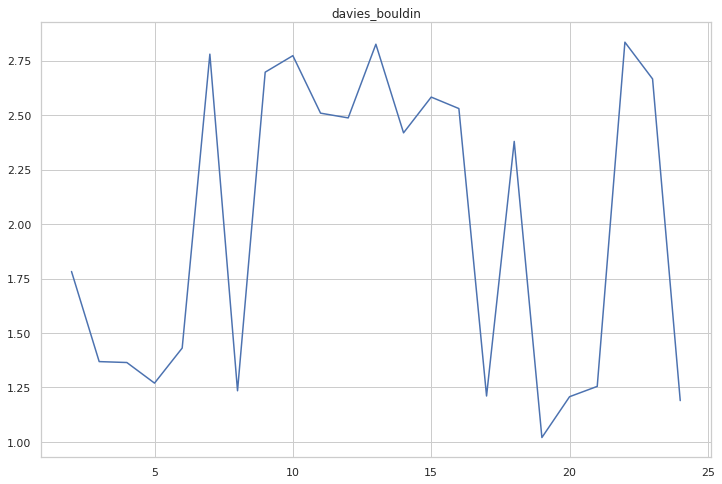

In [29]:
cgram.davies_bouldin_score()
cgram.davies_bouldin.plot(figsize=(12, 8), title="davies_bouldin")

In [30]:
labels = cgram.labels.copy()
labels.columns = labels.columns.astype("str")
labels.to_parquet("../../urbangrammar_samba/spatial_signatures/clustering_data/clustergram_function_labels.pq")

In [31]:
cgram.cluster_centers

{1: array([[ 6.44630942e-15, -1.03006792e-14,  1.01507522e-14,
         -4.15606740e-14,  5.89041791e-15, -2.48029690e-14,
         -2.69285122e-14, -7.17310221e-17, -1.78926795e-15,
         -2.42272353e-15,  4.66821953e-15,  5.20446474e-15,
         -5.55231323e-16,  9.54742659e-15,  1.33876464e-15,
          4.75940328e-15,  1.63782128e-15,  4.38206626e-16,
         -5.06016186e-15, -2.95763068e-15, -1.62967210e-15,
         -1.56128785e-15, -2.73832020e-15, -1.00649822e-15,
          1.67148309e-16,  8.80399364e-15,  7.29211635e-15,
          6.15556528e-15,  1.28831581e-16, -2.44374138e-16,
          0.00000000e+00, -3.92787282e-13, -6.43834192e-13,
          2.22113920e-12,  3.09324821e-12, -1.25302627e-14,
         -5.54056375e-13,  8.95793229e-13,  1.94883951e-13,
         -4.56751918e-14, -4.83161860e-14,  3.69390898e-14,
         -2.93408712e-14,  2.00288426e-14, -8.42277523e-14,
          5.69687311e-13, -1.71837831e-13,  1.02233805e-13,
         -6.77779913e-14, -3.18562191

In [32]:
import pickle

with open("../../urbangrammar_samba/spatial_signatures/clustering_data/clustergram_function_centers.pickle",'wb') as f:
    pickle.dump(cgram.cluster_centers, f)

In [4]:
from sklearn.cluster import MiniBatchKMeans


In [5]:
km = MiniBatchKMeans(n_clusters=7, batch_size=1_000_000, n_init=1000, random_state=42)
%time km.fit(data)
labels = km.labels_
pd.Series(labels).value_counts()

CPU times: user 6h 20min 9s, sys: 5h 55min 30s, total: 12h 15min 39s
Wall time: 2h 4min 34s


2    4936563
0    4040688
1    2879273
6    1041169
5     748556
3     557238
4     336091
dtype: int64

In [6]:
pd.DataFrame(labels, columns=["k7"], index=data.index).to_parquet(
    "../../urbangrammar_samba/spatial_signatures/clustering_data/k7_function_labels.pq")

## Generation of signature geometry

With each tessellation cell labelled we now have to dissolve all 14.5 million cells into signature geometry.

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import urbangrammar_graphics as ugg
import dask_geopandas
from utils.dask_geopandas import dask_dissolve

In [10]:
import warnings 

warnings.filterwarnings('ignore', message='.*initial implementation of Parquet.*')

In [11]:
labels = pd.read_parquet("../../urbangrammar_samba/spatial_signatures/clustering_data/k7_function_labels.pq")
labels

k7
hindex              
c000e109777t0000   2
c000e109777t0001   0
c000e109777t0002   0
c000e109777t0003   2
c000e109777t0004   0
...               ..
c102e634855t0000   1
c102e634854t0000   1
c102e634847t0000   1
c102e634850t0000   1
c102e614920t0000   1

[14539578 rows x 1 columns]

We first dissolve geometries in each chunk separately and store the result as another parquet file.

In [12]:
for i in range(103):
    geom = gpd.read_parquet(f"../../urbangrammar_samba/spatial_signatures/tessellation/tess_{i}.pq", columns=["tessellation", "hindex"]).set_index("hindex")
    geom = geom.merge(labels, how="left", left_index=True, right_index=True)


    ddf = dask_geopandas.from_geopandas(geom.sort_values('k7'), npartitions=64)
    spsig = dask_dissolve(ddf, by='k7').compute().reset_index(drop=True).explode()

    spsig.to_parquet(f"../../urbangrammar_samba/spatial_signatures/signatures/temp/spsig_{i}.pq")
    print(f"Chunk {i} done.")

Chunk 0 done.
Chunk 1 done.
Chunk 2 done.
Chunk 3 done.
Chunk 4 done.
Chunk 5 done.
Chunk 6 done.
Chunk 7 done.
Chunk 8 done.
Chunk 9 done.
Chunk 10 done.
Chunk 11 done.
Chunk 12 done.
Chunk 13 done.
Chunk 14 done.
Chunk 15 done.
Chunk 16 done.
Chunk 17 done.
Chunk 18 done.
Chunk 19 done.
Chunk 20 done.
Chunk 21 done.
Chunk 22 done.
Chunk 23 done.
Chunk 24 done.
Chunk 25 done.
Chunk 26 done.
Chunk 27 done.
Chunk 28 done.
Chunk 29 done.
Chunk 30 done.
Chunk 31 done.
Chunk 32 done.
Chunk 33 done.
Chunk 34 done.
Chunk 35 done.
Chunk 36 done.
Chunk 37 done.
Chunk 38 done.
Chunk 39 done.
Chunk 40 done.
Chunk 41 done.
Chunk 42 done.
Chunk 43 done.
Chunk 44 done.
Chunk 45 done.
Chunk 46 done.
Chunk 47 done.
Chunk 48 done.
Chunk 49 done.
Chunk 50 done.
Chunk 51 done.
Chunk 52 done.
Chunk 53 done.
Chunk 54 done.
Chunk 55 done.
Chunk 56 done.
Chunk 57 done.
Chunk 58 done.
Chunk 59 done.
Chunk 60 done.
Chunk 61 done.
Chunk 62 done.
Chunk 63 done.
Chunk 64 done.
Chunk 65 done.
Chunk 66 done.
Chunk

Now we combine all dissolved chunks and dissolve them again to get the final contiguous geometry.

In [13]:
spsigs = pd.concat([gpd.read_parquet(f"../../urbangrammar_samba/spatial_signatures/signatures/temp/spsig_{i}.pq") for i in range(103)])

In [14]:
ddf = dask_geopandas.from_geopandas(spsigs.sort_values('k7').reset_index(drop=True), npartitions=64)
spsig = dask_dissolve(ddf, by='k7').compute().reset_index(drop=True).explode()

spsig.to_parquet(f"../../urbangrammar_samba/spatial_signatures/signatures/signatures_function_K7_GB.pq")

In [9]:
spsig

k8                                       tessellation
0 0   0  POLYGON Z ((89280.000 7920.000 0.000, 89190.00...
  1   0  POLYGON Z ((92602.729 11420.758 0.000, 92581.2...
  2   0  POLYGON Z ((169705.076 15498.752 0.000, 169706...
  3   0  POLYGON Z ((170058.697 15486.278 0.000, 170003...
  4   0  POLYGON Z ((169696.219 16164.689 0.000, 169694...
..   ..                                                ...
7 5   7  POLYGON Z ((293374.200 758731.000 0.000, 29335...
  6   7  POLYGON Z ((283647.720 803019.800 0.000, 28364...
  7   7  POLYGON Z ((285459.203 803844.804 0.000, 28545...
  8   7  POLYGON Z ((283841.987 803707.777 0.000, 28384...
  9   7  POLYGON Z ((290570.716 809730.511 0.000, 29056...

[52393 rows x 2 columns]

The resulting geometry is dense and complicated. For exploration purposes, it is better to simplify it.

In [15]:
ddf = dask_geopandas.from_geopandas(spsig.reset_index().rename_geometry("geometry"), npartitions=64)
ddf.geometry = ddf.simplify(2).buffer(.001).simplify(2)

In [16]:
%time spsig = ddf.compute()

CPU times: user 19min 35s, sys: 100 ms, total: 19min 35s
Wall time: 3min 44s


In [17]:
spsig

level_0  level_1  k7  \
0             0        0   0   
1             0        1   0   
2             0        2   0   
3             0        3   0   
4             0        4   0   
...         ...      ...  ..   
117083        6    11188   6   
117084        6    11189   6   
117085        6    11190   6   
117086        6    11191   6   
117087        6    11192   6   

                                                 geometry  
0       POLYGON ((368044.653 71399.205, 368052.287 714...  
1       POLYGON ((369507.236 71859.201, 369482.224 718...  
2       POLYGON ((367184.663 77669.161, 367204.201 776...  
3       POLYGON ((367864.922 78708.351, 367861.001 786...  
4       POLYGON ((366114.838 77328.193, 366103.546 773...  
...                                                   ...  
117083  POLYGON ((447564.348 514275.732, 447562.866 51...  
117084  POLYGON ((449199.177 527544.803, 449183.433 52...  
117085  POLYGON ((449199.136 527797.064, 449187.326 52...  
117086  POLYGON ((453391.251 513903.744, 453377.348 51...  
117087  POLYGON ((452310.000 1174670.001, 452350.001 1...  

[117088 rows x 4 columns]

Now we save our geometries to files.

In [18]:
spsig.to_file(f"../../urbangrammar_samba/spatial_signatures/signatures/signatures_function_K7_GB_simplified.geojson", driver="GeoJSON")

In [19]:
spsig.to_parquet(f"../../urbangrammar_samba/spatial_signatures/signatures/signatures_function_K7_GB_simplified.pq")

In [20]:
spsig.to_file("signatures_function_K7_GB_simplified.gpkg", driver="GPKG")